In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from scipy.stats.mstats import winsorize
sb.set() 

## Cleaning the dataset

quakeData = pd.read_csv('train_values.csv')
quakeData.describe()

quakeData = quakeData.astype({"damage_grade": 'category', "land_surface_condition": 'category', "foundation_type": 'category'})
quakeData = quakeData.astype({"ground_floor_type": 'category', "position": 'category', "plan_configuration": 'category'})
quakeData = quakeData.astype({"has_superstructure_adobe_mud": 'category', "has_superstructure_mud_mortar_stone": 'category', "has_superstructure_stone_flag": 'category'})
quakeData = quakeData.astype({"has_superstructure_cement_mortar_stone": 'category', "has_superstructure_mud_mortar_brick": 'category', "has_superstructure_cement_mortar_brick": 'category'})
quakeData = quakeData.astype({"has_superstructure_timber": 'category', "has_superstructure_bamboo": 'category', "has_superstructure_rc_non_engineered": 'category'})
quakeData = quakeData.astype({"has_superstructure_rc_engineered": 'category', "has_superstructure_other": 'category', "legal_ownership_status": 'category'})
quakeData = quakeData.astype({"has_secondary_use_agriculture": 'category', "has_secondary_use_hotel": 'category', "has_secondary_use_rental": 'category'})
quakeData = quakeData.astype({"has_secondary_use_institution": 'category', "has_secondary_use_school": 'category', "has_secondary_use_industry": 'category'})
quakeData = quakeData.astype({"has_secondary_use_health_post": 'category', "has_secondary_use_gov_office": 'category', "has_secondary_use_use_police": 'category'})
print(quakeData.dtypes)

## Statistical Distribuitions

#Predictors, split according to data type
num_quakeData = pd.DataFrame(quakeData[["count_floors_pre_eq", "age", "area_percentage", "height_percentage"]])
cat_quakeData = pd.DataFrame(quakeData[["land_surface_condition", "foundation_type", "ground_floor_type", "position", "plan_configuration", "has_superstructure_adobe_mud", "has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag", "has_superstructure_cement_mortar_stone", "has_superstructure_mud_mortar_brick", "has_superstructure_cement_mortar_brick", "has_superstructure_timber", "has_superstructure_bamboo", "has_superstructure_rc_non_engineered", "has_superstructure_rc_engineered"]])

#Response Variable
damage_quakeData = pd.DataFrame(quakeData['damage_grade'])

building_id                                  int64
geo_level_1_id                               int64
geo_level_2_id                               int64
geo_level_3_id                               int64
count_floors_pre_eq                          int64
age                                          int64
area_percentage                              int64
height_percentage                            int64
land_surface_condition                    category
foundation_type                           category
roof_type                                   object
ground_floor_type                         category
other_floor_type                            object
position                                  category
plan_configuration                        category
has_superstructure_adobe_mud              category
has_superstructure_mud_mortar_stone       category
has_superstructure_stone_flag             category
has_superstructure_cement_mortar_stone    category
has_superstructure_mud_mortar_b

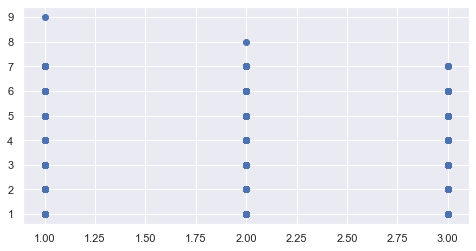

In [2]:
# Extract the Features from the Data

X = pd.DataFrame(quakeData[["damage_grade", "count_floors_pre_eq"]])

# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(8,4))
plt.scatter(x = "damage_grade", y = "count_floors_pre_eq", data = X)

In [3]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
# Print the Cluster Centers
print("Features", "\tDamageGrade", "\tCount of floors pre-earthquake")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t\t")
    print()

Features 	DamageGrade 	Count of floors pre-earthquake

Cluster 0:	1.84		1.78		
Cluster 1:	3.0		1.82		
Cluster 2:	2.36		3.17		


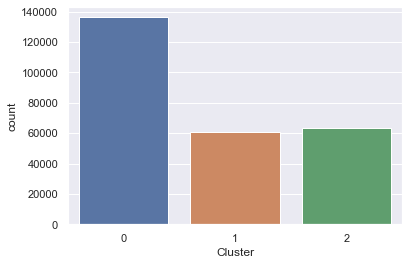

In [5]:
# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

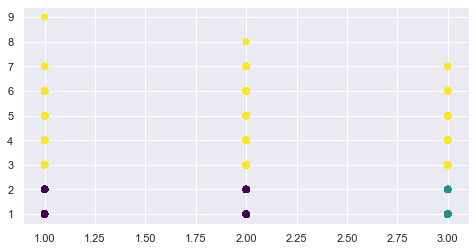

In [9]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(8,4))
plt.scatter(x = "damage_grade", y = "count_floors_pre_eq", c = "Cluster", cmap = 'viridis', data = X_labeled)

In [7]:
quakeData.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


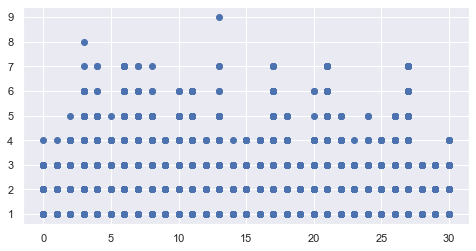

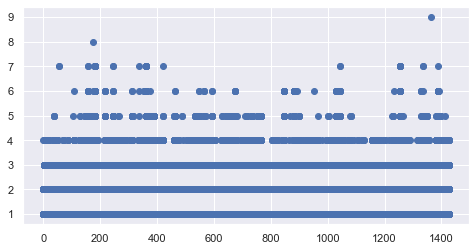

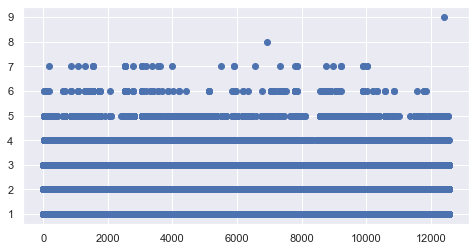

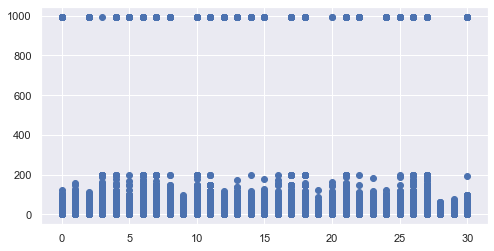

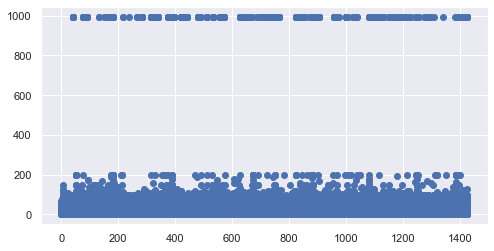

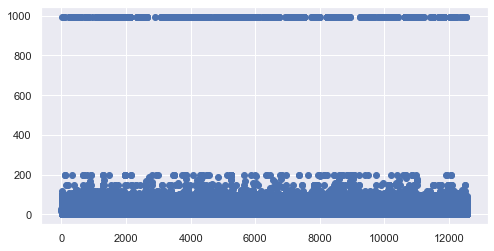

In [8]:
# Extract the Features from the Data
X1 = pd.DataFrame(quakeData[["geo_level_1_id", "count_floors_pre_eq"]])
X2 = pd.DataFrame(quakeData[["geo_level_2_id", "count_floors_pre_eq"]])
X3 = pd.DataFrame(quakeData[["geo_level_3_id", "count_floors_pre_eq"]])
Y1 = pd.DataFrame(quakeData[["geo_level_1_id", "age"]])
Y2 = pd.DataFrame(quakeData[["geo_level_2_id", "age"]])
Y3 = pd.DataFrame(quakeData[["geo_level_3_id", "age"]])
# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(8,4))
plt.scatter(y = "count_floors_pre_eq", x = "geo_level_1_id", data = X1)
f, axes = plt.subplots(1, 1, figsize=(8,4))
plt.scatter(y = "count_floors_pre_eq", x = "geo_level_2_id", data = X2)
f, axes = plt.subplots(1, 1, figsize=(8,4))
plt.scatter(y = "count_floors_pre_eq", x = "geo_level_3_id", data = X3)
f, axes = plt.subplots(1, 1, figsize=(8,4))
plt.scatter(y = "age", x = "geo_level_1_id", data = Y1)
f, axes = plt.subplots(1, 1, figsize=(8,4))
plt.scatter(y = "age", x = "geo_level_2_id", data = Y2)
f, axes = plt.subplots(1, 1, figsize=(8,4))
plt.scatter(y = "age", x = "geo_level_3_id", data = Y3)


In [16]:
# Guess the Number of Clusters
num_clust = 5

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X1)
# Print the Cluster Centers
print("Features", "\tgeo_level_1_id", "\tCount of floors pre-earthquake")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t\t")
    print()

Features 	geo_level_1_id 	Count of floors pre-earthquake

Cluster 0:	11.31		2.13		
Cluster 1:	26.29		1.99		
Cluster 2:	19.09		2.15		
Cluster 3:	2.87		2.36		
Cluster 4:	6.96		2.1		


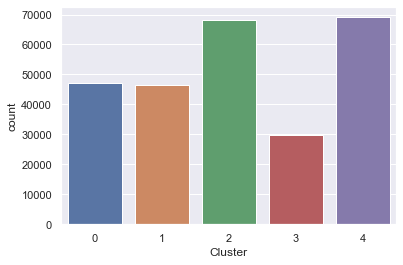

In [17]:
# Predict the Cluster Labels
labels = kmeans.predict(X1)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])


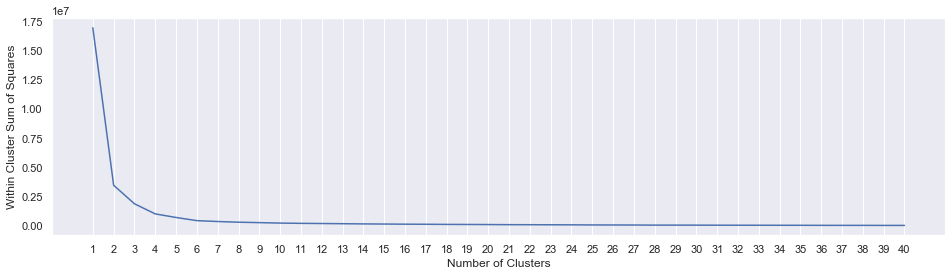

In [19]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(X1)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()